"""
To use this code, just modify the **INPUT** parameters, and then hit the **"START"** button (little triangle) on the left.

Created on Tue Sep 15 07:42:56 2020

**Uniformly spaced points on a cubic Bezier curve**

The Bezier curve is controlled with four points: 

    P0 (x0, y0)
    P1 (x1, y1)
    P2 (x2, y2)
    P3 (x3, y3)

For our purpose, the Bezier curve is symmetric to the x axis, and the lines P0P1 and P3P2 are parallel to the axi axis. Therefore,

    x0=x3=0;
    x1=x2;
    y0=y1;
    y2=y3=-y0;

In total there are three independent variables, x0, y0, and x1, with coordinates of points as below,

    P0 (x0, y0)
    P1 (x1, y0)
    P2 (x1, -y0)
    P3 (x0, -y0)
    
*Arc length of a Bezier curve is in between the cord length and the control net, and it can be approximated using the average of the two. The following algorithm makes use of this approximation.*

Assume that the desired axial length of the Bezier curve is L, and the width is W. Then y0=W/2, and  x1=L*4/3

@author: juliantao
"""

The coordinates of the evenly distributed points are: 
 [[ 0.00000000e+00  7.50000000e+01]
 [-6.14826814e+01  7.46939664e+01]
 [-1.22965467e+02  7.37272117e+01]
 [-1.84425949e+02  7.20109158e+01]
 [-2.45865943e+02  6.94250606e+01]
 [-3.07258650e+02  6.58012604e+01]
 [-3.68555780e+02  6.08874140e+01]
 [-4.29687283e+02  5.42665494e+01]
 [-4.90489843e+02  4.51381919e+01]
 [-5.50406250e+02  3.14526123e+01]
 [-6.00000000e+02  2.25000000e-03]
 [-5.50413150e+02 -3.14505483e+01]
 [-4.90500096e+02 -4.51363526e+01]
 [-4.29700069e+02 -5.42649381e+01]
 [-3.68570686e+02 -6.08860319e+01]
 [-3.07275414e+02 -6.58001082e+01]
 [-2.45884381e+02 -6.94241386e+01]
 [-1.84445923e+02 -7.20102241e+01]
 [-1.22986866e+02 -7.37267506e+01]
 [-6.15054182e+01 -7.46937358e+01]
 [ 0.00000000e+00 -7.50000000e+01]]


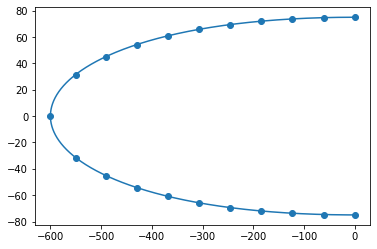

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='html5')

#function to calculate distance between two points
def dist(this_point, next_point):
    return math.sqrt((this_point[0]-next_point[0])**2+(this_point[1]-next_point[1])**2)

#function to calculate the arc length, which is approximated by the average of cord length and link length            
def delta(points):
    L1=dist(points[0], points[3])
    L2=dist(points[0], points[1]) + dist(points[1], points[2]) + dist(points[2], points[3])
    L=(L1+L2)/2
    return L



######### INPUT  ##########################################   
W=150       #Width of the layout
L=600       #Length of the layout
N=21        #Number of minipiles 
x1=-L*4/3    #x coordinate of the control points P1 and P2
y0=W/2      #y coordinate of the control point P0
x0=0        #x coordinate of the control point P0
###########################################################   

points = [[x0, y0], [x1,y0], [x1, -y0], [x0,-y0]]

# number of sampling points, the greater the better
t=np.linspace(0, 1, num=100001)

X=(1-t)**3*points[0][0]+3*(1-t)**2*t*points[1][0]+3*(1-t)*t**2*points[2][0]+t**3*points[3][0]
Y=(1-t)**3*points[0][1]+3*(1-t)**2*t*points[1][1]+3*(1-t)*t**2*points[2][1]+t**3*points[3][1]

delta_L=np.empty(len(t)-1)

for i in range (len(t)-1):
    t0=t[i]
    t1=t[i+1]
    u0=1-t0
    u1=1-t1
# calculate new control points for each segment
    P0=np.multiply(points[0],u0*u0*u0)+np.multiply(points[1], t0*u0*u0+u0*t0*u0+u0*u0*t0)+np.multiply(points[2],t0*t0*u0+u0*t0*t0+t0*u0*t0)+np.multiply(points[3], t0*t0*t0)

    P1=np.multiply(points[0],u0*u0*u1)+np.multiply(points[1], t0*u0*u1+u0*t0*u1+u0*u0*t1)+np.multiply(points[2],t0*t0*u1+u0*t0*t1+t0*u0*t1)+np.multiply(points[3], t0*t0*t1)
    
    P2=np.multiply(points[0],u0*u1*u1)+np.multiply(points[1], t0*u1*u1+u0*t1*u1+u0*u1*t1)+np.multiply(points[2],t0*t1*u1+u0*t1*t1+t0*u1*t1)+np.multiply(points[3], t0*t1*t1)
    
    P3=np.multiply(points[0],u1*u1*u1)+np.multiply(points[1], t1*u1*u1+u1*t1*u1+u1*u1*t1)+np.multiply(points[2],t1*t1*u1+u1*t1*t1+t1*u1*t1)+np.multiply(points[3], t1*t1*t1)
 
    
    newpoints=[P0, P1, P2, P3]
    delta_L[i]=delta(newpoints)

#fig2=plt.plot(delta_L)
#the approxiated total length of the curve
Lb=np.sum(delta_L)

# The cumulative length between the first point and the ith point
Cum=np.cumsum(delta_L)

# determine the positions of the mini piles
index=[]
for i2 in range(N-1):
    idx=next(x for x, val in enumerate(Cum) 
                                  if val > Lb*i2/(N-1))
    index.append(idx)
index.append(len(t)-1)

XX=[X[i3] for i3 in index]
YY=[Y[i4] for i4 in index]
coord=np.empty((N,2))
coord[:,0]=XX
coord[:,1]=YY
plt.plot(X,Y)
plt.scatter(XX, YY)

print("The coordinates of the evenly distributed points are: \n", coord)